In [1]:
import meep as mp
import numpy as np
from datetime import date
import pickle,json
import MyMeepFunctions as myF
import matplotlib.pyplot as plt 



Gap = 6.434e-01


fsrc = 1/1.5475 # frequency of eigenmode or constant-amplitude source
df = 16e-3

nfreq = 1000

resolution = 20 #pixels per distance unit, so 10 px/um rn. (ideal)


WGMr = 40
WGr = 0.5
Fthick = 0.05

sim,src,tran,sphereMode = myF.buildWGMmodel(WGMr,WGr,Gap,fsrc,df,resolution,nfreq)



-----------
Initializing structure...
time for choose_chunkdivision = 0.00103998 s
Working in 2D dimensions.
Computational cell is 100 x 100 x 0 with resolution 20
     block, center = (0,-41.1434,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,0,0)
          radius 40.05, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 40, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
subpixel-averaging is 89.5439% done, 0.467152 s remaining
time for set_epsilon = 12.4317 s
-----------
MPB solved for frequency_1(0.4,0,0) = 0.32533 after 12 iters
MPB solved for frequency_1(0.853977,0,0) = 0.636974 after 8 iters
MPB solved for frequency_1(0.867558,0,0) = 0.646203 after 6 iters
MPB solved for frequency_1(0.867558,0,0) = 0.646204 aft

(39.9, 40.1)

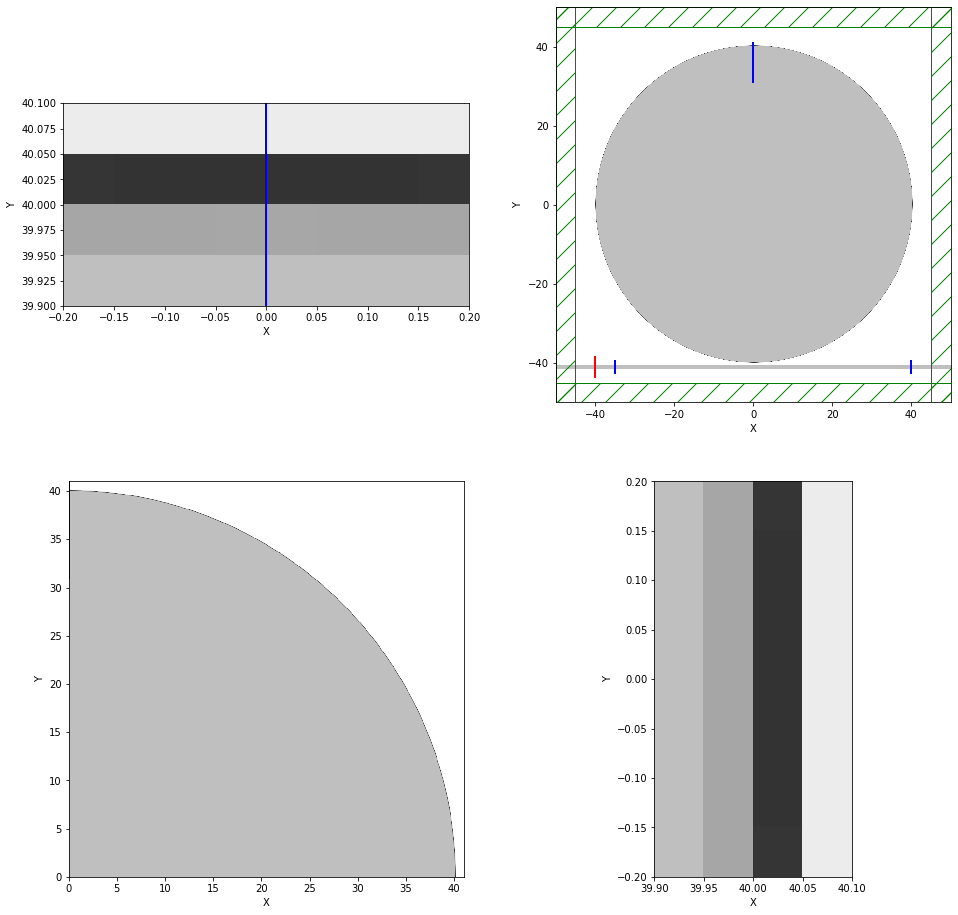

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(2,2,figsize=(16,16))


sim.plot2D(axes[0,0],plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'alpha':0.8, 'interpolation':'none'})
axes[0,0].set_xlim(-0.2,0.2)
axes[0,0].set_ylim(39.90,40.10)

sim.plot2D(axes[0,1],plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'alpha':0.8, 'interpolation':'none'})

sim.plot2D(axes[1,0],plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'alpha':0.8, 'interpolation':'none'})
axes[1,0].set_xlim(0,41)
axes[1,0].set_ylim(0,41)


sim.plot2D(axes[1,1],plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'alpha':0.8, 'interpolation':'none'})
axes[1,1].set_ylim(-0.2,0.2)
axes[1,1].set_xlim(39.90,40.10)


In [ ]:
t = (1e-6/3e8)
tFactor = 1e-15/t # converts femptoseconds into unitless MEEP 

Simtime = 100 #in femptoseconds

sim.use_output_directory('data/potato')

sim.run(mp.at_beginning(mp.output_epsilon),
        mp.at_every(100, mp.output_efield),
        until=(Simtime*tFactor))

-----------
Initializing structure...
time for choose_chunkdivision = 0.00102115 s
Working in 2D dimensions.
Computational cell is 100 x 100 x 0 with resolution 20
     block, center = (0,-41.1434,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,0,0)
          radius 40.05, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
     cylinder, center = (0,0,0)
          radius 40, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
subpixel-averaging is 88.1534% done, 0.537571 s remaining
time for set_epsilon = 11.973 s
-----------
MPB solved for frequency_1(0.4,0,0) = 0.32533 after 12 iters
MPB solved for frequency_1(0.853977,0,0) = 0.636974 after 8 iters
MPB solved for frequency_1(0.867558,0,0) = 0.646203 after 6 iters
MPB solved for frequency_1(0.867558,0,0) = 0.646204 afte

FloatProgress(value=0.0, description='0% done ', max=30.000000000000004)

creating output file "data/potato/eps-000000.00.h5"...
on time step 131 (time=3.275), 0.0305951 s/step
on time step 270 (time=6.75), 0.0289784 s/step


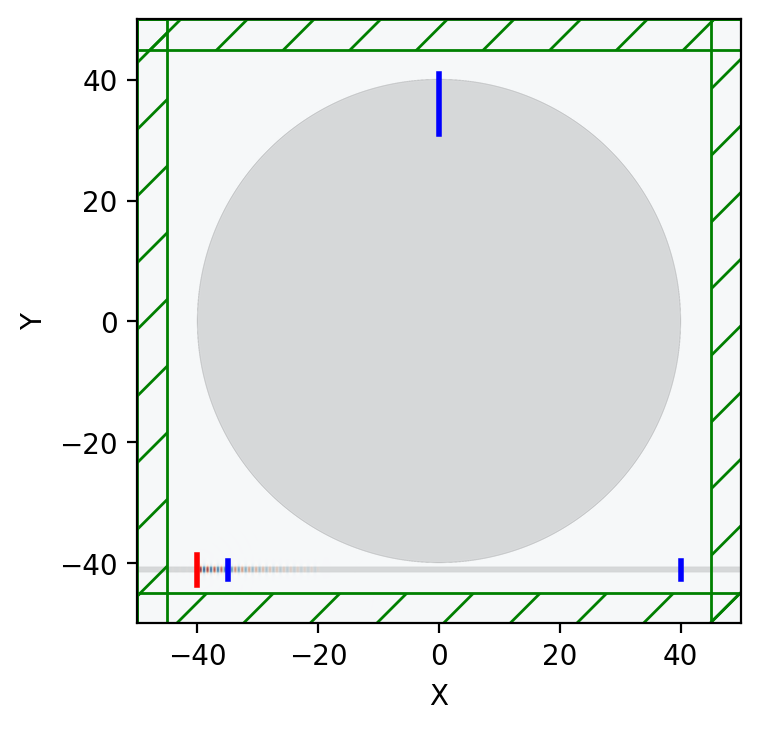

In [4]:
plt.figure(dpi=200)
sim.plot2D(fields=mp.Ez,plot_sources_flag=True,plot_monitors_flag=True)
plt.show()

In [8]:
today = str(date.today())

workingDir = 'data/potato'

meta = {
        "Gap": Gap,
        "fsrc": fsrc,
        "df": df,
        "nfreq":nfreq,
        "resolution":resolution,
        "WGMradius":WGMr,
        "WGradius":WGr
    }


myF.dumpData2File(meta,today,workingDir,sim,src,tran,sphereMode,nfreq)





RuntimeError: meep: process_dft_component: frequency index 1000 is outside the range of the frequency array of size 1000

In [11]:
matrix = np.zeros([len(sim.get_dft_array(sphereMode,mp.Ez,0)),nfreq],dtype=np.complex128)

# fill matrix
nfreq = 2000
for i in range(0,len(Lam)):
    matrix[:,i] = sim.get_dft_array(sphereMode,mp.Ez,i)

In [8]:
sim.get_dft_array(sphereMode,mp.Ez)

TypeError: get_dft_array() missing 1 required positional argument: 'num_freq'

In [9]:
Lam = 1/np.array(mp.get_flux_freqs(sphereMode))


1000
